## Author: Miral Patel

## Lets Grow More Internship January 2024

## Domain: Data Science

### Task 2- Stock Market Prediction And Forecasting Using Stacked LSTM

### Importing Necessary Libraries

In [1]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2
Note: you may need to restart the kernel to use updated packages.


Keyring is skipped due to an exception: 'keyring.backends'


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [4]:
#checking my tensorflow version
tf.__version__

'2.11.0'

### Importing Dataset

In [5]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [6]:
df=df. iloc[::-1]
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


### Data Pre-processing

In [8]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
df.shape

(2035, 8)

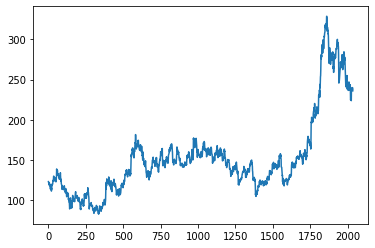

In [10]:
df_high=df.reset_index()['High']
plt.plot(df_high)

### By Applying Min Max scaler

In [11]:
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [12]:
df_high.shape

(2035, 1)

In [13]:
df_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

### Splitting Data Into Test And Train

In [14]:
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

In [15]:
training_size,test_size

(1526, 509)

In [16]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

    
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

### Reshaping The Input

In [17]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [18]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

### Creating LSTM Model

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 12s 276ms/step - loss: 0.0117 - val_loss: 0.0505
Epoch 2/100
23/23 [==============================] - 6s 242ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 3/100
23/23 [==============================] - 6s 245ms/step - loss: 8.5394e-04 - val_loss: 0.0036
Epoch 4/100
23/23 [==============================] - 6s 242ms/step - loss: 7.7157e-04 - val_loss: 0.0027
Epoch 5/100
23/23 [==============================] - 6s 241ms/step - loss: 7.0764e-04 - val_loss: 0.0032
Epoch 6/100
23/23 [==============================] - 6s 242ms/step - loss: 6.7591e-04 - val_loss: 0.0031
Epoch 7/100
23/23 [==============================] - 6s 241ms/step - loss: 6.5438e-04 - val_loss: 0.0032
Epoch 8/100
23/23 [==============================] - 6s 243ms/step - loss: 6.3231e-04 - val_loss: 0.0035
Epoch 9/100
23/23 [==============================] - 5s 238ms/step - loss: 6.1602e-04 - val_loss: 0.0031
Epoch 10/100
23/23 [==============================] - 5s 236ms

Epoch 78/100
23/23 [==============================] - 6s 242ms/step - loss: 1.3318e-04 - val_loss: 6.1469e-04
Epoch 79/100
23/23 [==============================] - 6s 245ms/step - loss: 1.1301e-04 - val_loss: 9.3555e-04
Epoch 80/100
23/23 [==============================] - 6s 244ms/step - loss: 1.1096e-04 - val_loss: 6.4162e-04
Epoch 81/100
23/23 [==============================] - 5s 237ms/step - loss: 1.1918e-04 - val_loss: 7.9778e-04
Epoch 82/100
23/23 [==============================] - 5s 239ms/step - loss: 1.2195e-04 - val_loss: 6.9222e-04
Epoch 83/100
23/23 [==============================] - 5s 237ms/step - loss: 1.1349e-04 - val_loss: 9.2858e-04
Epoch 84/100
23/23 [==============================] - 5s 236ms/step - loss: 1.1656e-04 - val_loss: 5.7735e-04
Epoch 85/100
23/23 [==============================] - 5s 238ms/step - loss: 1.2124e-04 - val_loss: 0.0015
Epoch 86/100
23/23 [==============================] - 5s 237ms/step - loss: 1.1977e-04 - val_loss: 5.3029e-04
Epoch 87/100
2

### Using Prediction For Performance Metrics

In [21]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [22]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### Calculating RMSE For Performance Metrics

In [23]:
math.sqrt(mean_squared_error(y_train, train_predict))

134.79380457978434

In [24]:
math.sqrt(mean_squared_error(y_test, test_predict))

228.24518712075215

### Plotting The Graph For Visualization Of Data

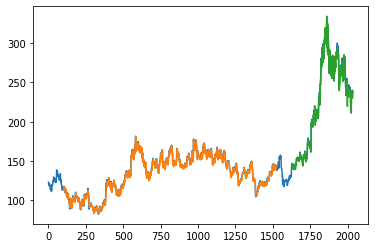

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [25]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

### Prediction For Next 28 Days Stock price

In [26]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [27]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [28]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.61100763]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 

10 day output [[0.40673292]]
11 day input [0.68936776 0.70217524 0.71803212 0.72941655 0.73144948 0.74486684
 0.76926205 0.75991055 0.74242732 0.73958122 0.74771295 0.75991055
 0.7584875  0.76621264 0.75462492 0.76316324 0.79670665 0.80585485
 0.7889815  0.78003659 0.73978451 0.73002643 0.73490547 0.74872942
 0.75991055 0.75462492 0.75401504 0.76174019 0.7737345  0.82008538
 0.80585485 0.81154706 0.77434438 0.78633869 0.79284407 0.78328929
 0.77109169 0.74385038 0.71193332 0.68733482 0.67818662 0.65257166
 0.64301687 0.65643423 0.67656028 0.67371417 0.65114861 0.65521447
 0.66761537 0.67838992 0.69993901 0.63122586 0.63508843 0.64098394
 0.64545639 0.64118723 0.63854442 0.63081927 0.62472047 0.6330555
 0.64728603 0.6574507  0.66761537 0.66720878 0.64159382 0.62776987
 0.63651149 0.63630819 0.62980281 0.62817646 0.63813783 0.65358813
 0.63183574 0.57653995 0.57816629 0.57613336 0.61943484 0.57979264
 0.57288067 0.62573694 0.63102257 0.6361049  0.62776987 0.6269567
 0.63590161 0.62594023

19 day output [[0.3362675]]
20 day input [0.73958122 0.74771295 0.75991055 0.7584875  0.76621264 0.75462492
 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659 0.73978451
 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492 0.75401504
 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706 0.77434438
 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038 0.71193332
 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423 0.67656028
 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992 0.69993901
 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723 0.63854442
 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507  0.66761537
 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819 0.62980281
 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995 0.57816629
 0.57613336 0.61943484 0.57979264 0.57288067 0.62573694 0.63102257
 0.6361049  0.62776987 0.6269567  0.63590161 0.62594023 0.6391543
 0.62614353 0.62268754 0.61100763 0.58324891 0.55532843 0.53100055
 0.50923562 0.48918012

In [29]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [30]:
day_new.shape

(100,)

In [31]:
day_pred.shape

(28,)

In [32]:
df3 = df_high.tolist()
df3.extend(lst_output)

len(df_high)

2035

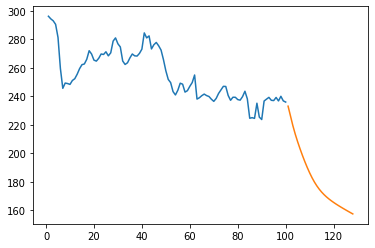

In [33]:
plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

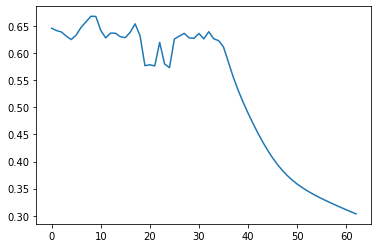

In [34]:
df3=df_high.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [35]:
df3=scaler.inverse_transform(df3).tolist()

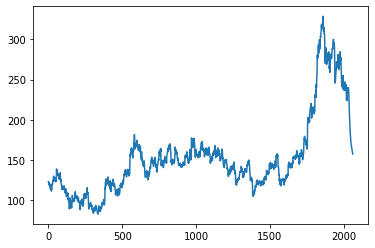

In [36]:
plt.plot(df3)

## Task Completed By Miral patel

## Thankyou